## newer for mb paper

07-11-2024 11:04:03 - __preprocessing__ - INFO - Create ..\..\model_results\selected_features\degree_of_rcloss
07-11-2024 11:04:03 - __preprocessing__ - INFO - Create ..\..\models_trained\final_models\degree_of_rcloss
07-11-2024 11:04:03 - __preprocessing__ - INFO - Create ..\..\models_trained\nested_cv_models\degree_of_rcloss
07-11-2024 11:04:03 - __preprocessing__ - INFO - Create ..\..\model_results\models_evaluation\degree_of_rcloss


..\..\model_results\selected_features\degree_of_rcloss ..\..\models_trained\final_models\degree_of_rcloss ..\..\models_trained\nested_cv_models\degree_of_rcloss ..\..\model_results\models_evaluation\degree_of_rcloss


07-11-2024 11:04:05 - __feature_extraction_degree__ - INFO - (320, 20)
07-11-2024 11:04:05 - __feature_extraction_degree__ - INFO - 

############ Applying cforest on rcloss ############
 
07-11-2024 11:04:05 - __feature_extraction_degree__ - INFO - Removing 191 zero loss records
07-11-2024 11:04:05 - __feature_extraction_degree__ - INFO - Removing 0 records from entire dataset due that these values are nan in target variable
07-11-2024 11:04:05 - __feature_extraction_degree__ - INFO - Finally use 113 records for feature extraction, from those are 0 cases with zero-loss or zero-reduction
07-11-2024 11:04:05 - __feature_extraction_degree__ - INFO - Use for feature extraction 14 features to predict degree of rcloss


Index(['rcloss', 'closs', 'inundation duration', 'water depth inside',
       'contaminations', 'flow velocity', 'flood experience', 'building age',
       'building area', 'geometry', 'shp_business_limitation', 'shp_sector',
       'mthly. income', 'emergency measures', 'no. employees',
       'non-structural measures', 'structural measures', 'resilience',
       'shp_content_value_euro', 'mthly. sales'],
      dtype='object')
removed unneded feautre from feautre space: closs
removed unneded feautre from feautre space: shp_business_limitation
removed unneded feautre from feautre space: shp_content_value_euro
removed unneded feautre from feautre space: shp_sector
removed unneded feautre from feautre space: geometry
Dropping records with missing values


R[write to console]: Fitting final model using CV on whole data

R[write to console]: Performing 10-fold outer CV, using 1 core

R[write to console]: Duration: 7.839409 mins



Nested cross-validation with caret
Method:  cforest 
No filter
Outer loop:  10-fold cv
Inner loop:  10-fold repeatedcv
113 observations, 14 predictors

         mtry  n.filter
Fold 1     12        14
Fold 2      8        14
Fold 3      8        14
Fold 4      8        14
Fold 5      8        14
Fold 6      6        14
Fold 7      8        14
Fold 8     14        14
Fold 9      8        14
Fold 10    12        14

Final parameters:
  mtry
     6

Result:
    RMSE   Rsquared        MAE   
 19.8187     0.1223    12.6023   


07-11-2024 11:11:55 - __model_training__ - INFO - 
Summary CRF 
 $dimx
[1] 113  14

$folds
        mtry n.filter
Fold 1    12       14
Fold 2     8       14
Fold 3     8       14
Fold 4     8       14
Fold 5     8       14
Fold 6     6       14
Fold 7     8       14
Fold 8    14       14
Fold 9     8       14
Fold 10   12       14

$final_param
  mtry
3    6

$result
    RMSE   Rsquared        MAE   
 19.8187     0.1223    12.6023   


07-11-2024 11:11:58 - __feature_extraction_degree__ - INFO - Performance of best CRF model: 


test_MAE: 9.016692748469636
test_RMSE: 10.853326037840738
test_MBE: 5.701715444621491
test_SMAPE: 53.885639961052995
  |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| 100%


07-11-2024 11:12:27 - __feature_extraction_degree__ - INFO - 
Select features based on permutation feature importance
07-11-2024 11:12:27 - __feature_extraction_degree__ - INFO - 5 most important features: ['mthly. sales', 'building age', 'mthly. income', 'flow velocity', 'water depth inside']
07-11-2024 11:12:27 - __feature_extraction_degree__ - INFO - 
Training and evaluation of cforest took 8.374594033333333 minutes

07-11-2024 11:12:27 - __feature_extraction_degree__ - INFO - Outer evaluation scores of nested cross-validation (mean) :
        cforest_score  cforest_score_std
MAE           12.419              4.192
RMSE          17.837              8.120
MBE            0.228              6.949
SMAPE         50.487              5.568 
.. saved to ..\..\model_results\models_evaluation\degree_of_rcloss/performance_rcloss.xlsx
07-11-2024 11:12:28 - __feature_extraction_degree__ - INFO - Dropping 0 records from entire dataset due that these values are nan in target variable
07-11-2024 11


cforest predicted target from cross-valdiated outer folds:
           nobs  median       mean  min max  variance  standard deviation   
empirical   113     3.0  12.212389  [0, 93]    450.28               21.13  \
predicted   113    10.0  12.159292  [3, 33]     60.56                7.75   

           coef. of variation  
empirical          173.755562  
predicted           64.002635  


<Figure size 2000x1000 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

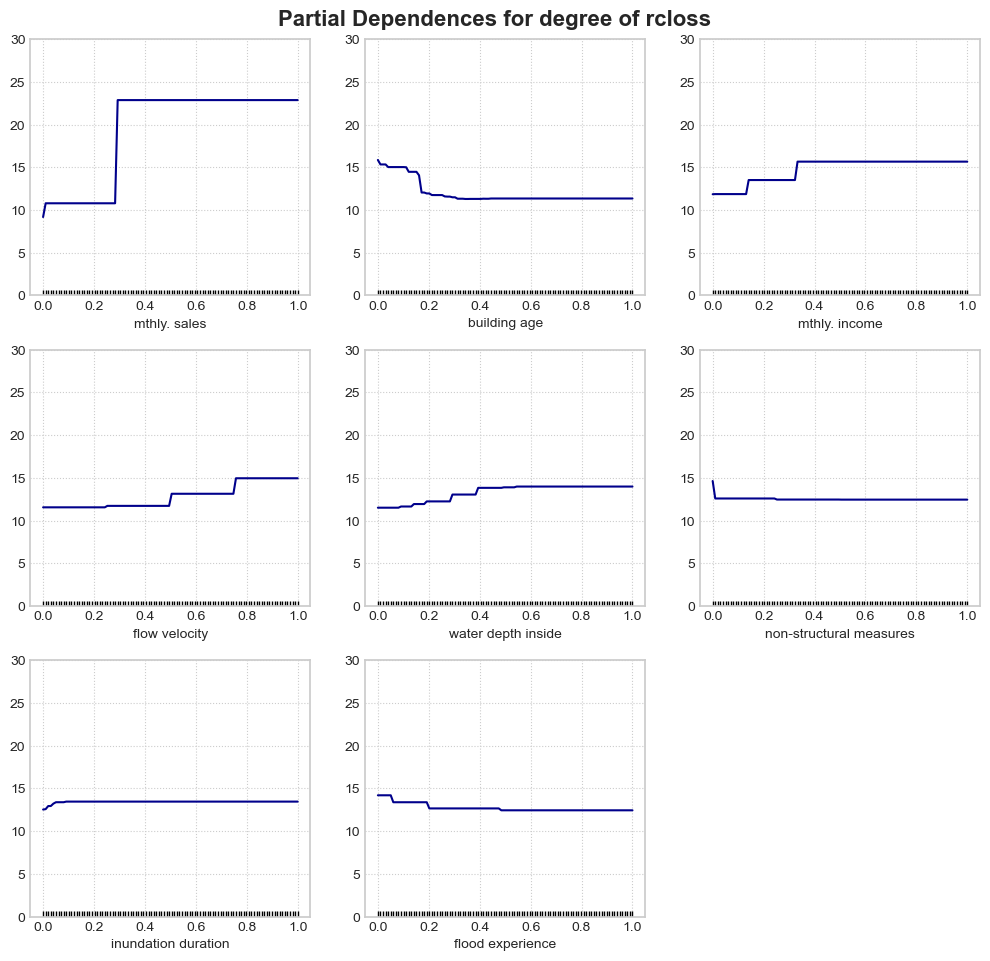

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""Featue selection with ML models for HCMC survey dataset"""

__author__ = "Anna Buch, Heidelberg University"
__email__ = "a.buch@stud.uni-heidelberg.de"


"""
This script is part of the feature-selction-workflow which is used to identify the drivers of direct economic losses to microbusiensses.
The dataset used in this script is based on the HCMC survey data collected in 2020 in Ho Chi Minh City, Vietnam.

The drivers of following damage type are identified in this script (marked by *):
- relative content loss (rcloss) with its components:
  -  chance of content loss (hazard component)
  -  degree of content loss (vulnerability component) *
- relative losse due to business interruption (rbred) 

The feature selection is performed using the Conditional Random Forest (CRF) regression model.
Due to the small size of the HCMC survey dataset a Nested Cross-Valdiation (CV) is used to assess the predicitve performance of the tested ML-model.
The inner CV selects the best hyperparameters based on 10-folds with 5 repetitions, 
while the outer CV returns the generalization error across all estimators of a model. 
Nested CV is computationally intensive but this limitation is mitigated by the samll sample size and 
a well chosen set of hyperparameters. Their value ranges were narrowed down in previous model-runs on the HCMC dataset.

The script includes various utility functions and imports necessary packages for data preprocessing, model training, evaluation, and visualization.
"""


import sys
import os
from datetime import datetime
from pathlib import Path
import joblib
import numpy as np
import pandas as pd
import re

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import make_scorer, mean_absolute_error

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns


UTILS_PATH = os.path.join(os.path.abspath(""), "../", "utils")
sys.path.append(UTILS_PATH)

import feature_selection as fs
import training as t
import evaluation as e
import evaluation_utils as eu
import figures as f
import settings as s
import pipelines as p
import preprocessing as pp

seed = s.seed

pd.set_option("display.max_columns", None)
plt.figure(figsize=(20, 10))

import contextlib
import warnings

warnings.filterwarnings("ignore")

#### Load R packages to process Conditional Random Forest in python
# *NOTE 1: all needed R packages have to be previously loaded in R*
# *NOTE 2: Make sure that caret package version >= 6.0-81, otherwise caret.train() throws an error*
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr


# get basic R packages
utils = importr("utils")
base = importr("base")
dplyr = importr("dplyr")
stats_r = importr("stats")  # rename due to similar python package

# pandas.DataFrames to R dataframes
pandas2ri.activate()

# get libraries for CRF processing, ctree_controls etc
# party = importr("party")  # Random Forest with Conditional Inference Trees (Conditional Random Forest)
# permimp = importr("permimp")  # conditional permutation feature importance
# caret = importr("caret")  # package version needs to be higher than  >=  6.0-90


targets = [("rcloss", "degree of rcloss"), ("rbred", "rbred")]
target, target_plot = targets[0]   # <- change here: flood loss variable to process
pred_target = f"pred_{target}"


# Get logger  # test: init application
main_logger = "__feature_extraction_degree__"
logger = s.init_logger(main_logger)

## settings for cv
kfolds_and_repeats = 10, 5 # 3, 1  # <k-folds, repeats> for nested cv
inner_cv = RepeatedKFold(n_splits=kfolds_and_repeats[0], n_repeats=kfolds_and_repeats[1], random_state=seed)
outer_cv = RepeatedKFold(n_splits=kfolds_and_repeats[0], n_repeats=1, random_state=seed)  # make same as for R nestedcv.train()


## save models and their evaluation in following folders:
INPATH_DATA = Path(s.INPATH_DATA) # input path
OUTPATH_FEATURES, OUTPATH_FINALMODELS, OUTPATH_ESTIMATORS_NCV, OUTPATH_RESULTS = [ # create output paths
    pp.create_output_dir( ".." / Path(d) / "degree_of_rcloss") for d in  
    [s.OUTPATH_FEATURES, s.OUTPATH_FINALMODELS, s.OUTPATH_ESTIMATORS_NCV, s.OUTPATH_EVAL]
]
print(OUTPATH_FEATURES, OUTPATH_FINALMODELS, OUTPATH_ESTIMATORS_NCV, OUTPATH_RESULTS)



## preprocessed HCMC survey data for rcloss
df_candidates = pd.read_excel(f"../{INPATH_DATA}/input_data_contentloss_tueb.xlsx")

##  use nice feature names
df_candidates.rename(columns=s.feature_names_plot, inplace=True)

print(df_candidates.columns)
# with contextlib.suppress(Exception):
#     df_candidates.drop(["hh_monthly_income_euro", "shp_content_value_euro"], axis=1, inplace=True)


logger.info(df_candidates.shape)

## Evaluation metrics
score_metrics = {
    "MAE": make_scorer(mean_absolute_error, greater_is_better=False),
    "RMSE": make_scorer(eu.root_mean_squared_error, greater_is_better=False),
    "MBE": make_scorer(eu.mean_bias_error, greater_is_better=False),
    # "R2": "r2",
    "SMAPE": make_scorer(eu.symmetric_mean_absolute_percentage_error, greater_is_better=False),
}


## Load set of hyperparameters
hyperparams_set = pp.load_config(f"{UTILS_PATH}/hyperparameter_sets.json")


## for the paper only the CRF (degree of rcloss, rbred) and Logistic Regression models (chance of rcloss) are used
## XGB and EN lead to Feature importance scores which are bias by multicollinearity,
## thus they are not used in the final feature selection workflow. However, their predicitve performances are reported by this script 
# pipelines = ["pipe_crf", "pipe_xgb", "pipe_en"]
pipelines = ["pipe_crf"]


## empty variables to store model outputs
eval_sets = {}
models_trained = {}
final_models_trained = {}
models_coef = {}
predicted_values = {}
df_feature_importances = pd.DataFrame(index=df_candidates.drop(target, axis=1).columns.to_list())
models_scores = {}



for pipe_name in pipelines:

    TIME0 = datetime.now()

    ## load model pipelines
    pipe = joblib.load(f"{UTILS_PATH}/pipelines/{pipe_name}.pkl")
    try:
        model_name = re.findall("[a-zA-Z]+", str(pipe.steps[1][1].__class__).split(".")[-1])[0]  # get model name for python models
    except AttributeError:
        model_name = pipe  # get R model name (only needed for CRF)

    ## load respective hyperparameter space
    param_space = hyperparams_set[f"{model_name}_hyperparameters"]

    ## if bagging fro model training is used , rename hyperparmeters
    if "bag" in pipe_name.split("_"):
        logger.info(f"Testing {model_name} with bagging")
        param_space = {k.replace("model", "bagging__estimator"): v for (k, v) in param_space.items()}

    logger.info(f"\n\n############ Applying {model_name} on {target} ############\n ")

    # save original df for later
    df_Xy = df_candidates

    ## drop unneded features (e.g. business limitation, closs etc) due these vars are only needed for analysis 
    ## or to recalculate content losses after BN
    for i in ["closs", "shp_business_limitation", "shp_content_value_euro", "shp_sector", "geometry"]:
        try:
            df_Xy.drop(i, axis=1, inplace=True)
            print(f"removed unneded feautre from feautre space: {i}" )
        except:
            continue
    
    # get predictor names
    X_names = df_Xy.drop(target, axis=1).columns.to_list()

    ## remove zero-loss records (only needed for estimating degree of content loss)
    if target == "rcloss":
        logger.info(f"Removing {df_Xy.loc[df_Xy[target]==0.0,:].shape[0]} zero loss records")
        df_Xy = df_Xy.loc[df_Xy[target] != 0.0, :]

    ## drop samples where target is nan
    logger.info(f"Removing {df_Xy[target].isna().sum()} records from entire dataset due that these values are nan in target variable")
    df_Xy = df_Xy[~df_Xy[target].isna()]

    ## Elastic Net and Random Forest: drop samples where any value is nan
    if (model_name == "ElasticNet") | (model_name == "cforest"):
        print("Dropping records with missing values")
        df_Xy.dropna(inplace=True)
        # df_Xy = df_Xy.apply(lambda x: x.fillna(x.median()), axis=0)
        # print("Impute records with missing values for Elastic Net or cforest",
        #        f"keeping {df_Xy.shape} damage cases for model training and evaluation")


    logger.info(
        f"Finally use {df_Xy.shape[0]} records for feature extraction, from those are {(df_Xy[target][df_Xy[target] == 0.0]).count()} cases with zero-loss or zero-reduction",
    )

    X = df_Xy[X_names]
    y = df_Xy[target]

    logger.info(f"Use for feature extraction {X.shape[1]} features to predict {target_plot}")

    ## run sklearn model
    if model_name != "cforest":

        ## fit model for unbiased model evaluation and for final model used for Feature importance, Partial Dependence etc.
        mf = t.ModelFitting(
            model=pipe,
            Xy=df_Xy,
            target_name=target,
            param_space=param_space,
            tuning_score=score_metrics["MAE"],  # tune by getting reducing MAE
            cv=inner_cv,
            kfolds_and_repeats=kfolds_and_repeats,
            seed=seed,
        )
        models_trained_ncv = mf.model_fit_ncv()

        # save models from nested cv and final model on entire ds
        joblib.dump(models_trained_ncv, f"{OUTPATH_ESTIMATORS_NCV}/{model_name}_{target}.joblib")

        ## evaluate model
        me = e.ModelEvaluation(
            models_trained_ncv=models_trained_ncv,
            Xy=df_Xy,
            target_name=target,
            score_metrics=score_metrics,
            cv=outer_cv,
            kfolds=kfolds_and_repeats[0],
            seed=seed,
        )
        model_evaluation_results = me.model_evaluate_ncv()

        ## reverse sklearn.cross_validate() outputted regression scores (e.g. MAE, RMSE, SMAPE, R2)
        model_evaluation_results = me.negate_scores_from_sklearn_cross_valdiate(
            model_evaluation_results,
            metric_names=("test_MAE", "test_MBE", "test_RMSE", "test_SMAPE")
        )

        ## visual check if hyperparameter ranges are good or need to be adapted
        logger.info("Parameter sets of best estimators outer test-sets:")
        for i in range(len(model_evaluation_results["estimator"])):
            print(f"{model_name}: ", model_evaluation_results["estimator"][i].best_params_)
        print("\n")

        ## store models evaluation
        models_scores[model_name] = {
            k: model_evaluation_results[k] for k in tuple("test_" + s for s in list(score_metrics.keys()))
        }  # get evaluation scores, metric names start with "test_<metricname>"


        ## Best-performed (aka. final) model

        ## get  and save final model based on best MAE score during outer cv
        best_idx = list(models_scores[model_name]["test_MAE"]).index(min(models_scores[model_name]["test_MAE"]))
        final_model = model_evaluation_results["estimator"][best_idx]
        logger.info(f"Params of best model: {final_model.best_params_}")
        final_model = final_model.best_estimator_

        ## print performance of best estimator
        logger.info("Performance of best estimator")
        for metric in models_scores[model_name].keys():
            print(metric, models_scores[model_name][metric][best_idx])

        final_models_trained[model_name] = final_model
        joblib.dump(final_model, f"{OUTPATH_FINALMODELS}/{model_name}_{target}.joblib")


        ## get predictions of final model from respective outer test set
        test_set_best = df_Xy.iloc[model_evaluation_results["indices"]["test"][best_idx], :]
        finalmodel_X_test = test_set_best.drop(target, axis=1)
        finalmodel_y_test = test_set_best[target]
        finalmodel_y_pred = final_model.predict(finalmodel_X_test)  # get predictions from final model for its test-set (should be the same as done during model evluation with ncv)


        ## Learning curve of train and test set of final model
        train_set_best = df_Xy.iloc[model_evaluation_results["indices"]["train"][best_idx], :]
        f.plot_learning_curves(
            final_model, train_set_best, test_set_best, target,
            f"{OUTPATH_RESULTS}/learning_curves_{target}_{model_name}.png", model_name)

        ## Feature importances from best model (model validated on its test set)
        importances = me.permutation_feature_importance(final_model, finalmodel_X_test, finalmodel_y_test, repeats=5)
 
        ## regression coefficients for linear models from best estimator
        with contextlib.suppress(Exception):
            models_coef[model_name] = me.calc_regression_coefficients(final_model, finalmodel_y_test, finalmodel_y_pred)

            outfile = f"{OUTPATH_RESULTS}/regression_coefficients_{model_name}_{target}.xlsx"
            models_coef[model_name].round(3).to_excel(outfile, index=True)
            logger.info(
                f"Regression Coefficients:\n {models_coef[model_name].sort_values('probabilities', ascending=False)} \n .. saved to {outfile}"
            )

            ## check if any regression coefficient is significant
            if np.min(models_coef[model_name]["probabilities"]) >= 0.05:
                ## non permanent decorator, extending with creation of log file for warnings
                logger = s.decorate_init_logger(s.init_logger)("__warning_coefs__")
                logger.info("non of the regression coefficients is significant")
                logger = s.init_logger(main_logger)  # reset to previous state


    ## run R model (Conditional Random Forest)
    else:
        ## define model settings
        mf = t.ModelFitting(
            model=pipe,  # pipe contains only name of applied R algorithm
            Xy=df_Xy,
            target_name=target,
            param_space=param_space,
            tuning_score=score_metrics["MAE"],
            cv=inner_cv,
            kfolds_and_repeats=kfolds_and_repeats,
            seed=s.seed,
        )
        # NOTE: normalization is not mandatory for decision-trees but might decrease processing time
        models_trained_ncv = mf.r_model_fit_ncv()  # pipe
        joblib.dump(models_trained_ncv, f"{OUTPATH_ESTIMATORS_NCV}/{model_name}_{target}.joblib")


        me = e.ModelEvaluation(
            models_trained_ncv=models_trained_ncv,
            Xy=df_Xy,
            target_name=target,
            score_metrics=score_metrics,  # make optional in ModelEvlaution() class
            cv=outer_cv,
            kfolds=kfolds_and_repeats[0],
            seed=s.seed,
        )
        model_evaluation_results = me.r_model_evaluate_ncv()


        ## get std of CRF from inner folds
        ## TODO shorter name for r_model_evaluation_dict
        r_model_evaluation_dict = {a: [] for a in ["test_MAE", "test_RMSE", "test_MBE", "test_SMAPE"]}
        # r_model_evaluation_dict =  {a : [] for a in ["test_MAE", "test_RMSE", "test_MBE", "test_R2", "test_SMAPE"]}
        for idx in range(1, kfolds_and_repeats[0] + 1):  # number of estimators , R counts starting from 1
            df = me.r_models_cv_predictions(idx)  # get all crf estimators from outer cv
            r_model_evaluation_dict["test_MAE"].append(mean_absolute_error(df.testy, df.predy))
            r_model_evaluation_dict["test_RMSE"].append(eu.root_mean_squared_error(df.testy, df.predy))  # (df.testy, df.predy)
            r_model_evaluation_dict["test_MBE"].append(eu.mean_bias_error(df.testy, df.predy))
            # r_model_evaluation_dict["test_R2"].append(eu.r2_score(df.testy, df.predy))
            r_model_evaluation_dict["test_SMAPE"].append(eu.symmetric_mean_absolute_percentage_error(df.testy, df.predy))

        ## final CRF model
        final_model = me.r_get_final_model(models_trained_ncv) # get best-performed CRF-estimator, validated in outer loop of nested CV
        best_idx = list(r_model_evaluation_dict["test_MAE"]).index(min(r_model_evaluation_dict["test_MAE"]))

        ## performance of final CRF model
        logger.info("Performance of best CRF model: ")
        for metric in r_model_evaluation_dict.keys():
            print(f"{metric}: {r_model_evaluation_dict[metric][best_idx]}")

        ## plot cforest learning curve
        f.plot_r_learning_curve(df_Xy, target, f"{OUTPATH_RESULTS}/learning_curves_{target}_{model_name}.png")

        ## Feature importance of best model
        importances = me.r_permutation_feature_importance(final_model)

        ## store model evaluation and final model
        models_scores[model_name] = r_model_evaluation_dict  ## store performance scores from R estimators
        final_models_trained[model_name] = final_model
        joblib.dump(final_model, f"{OUTPATH_FINALMODELS}/{model_name}_{target}.joblib")



    # ## Collect all models and their model evaluations

    ## store fitted models and their evaluation results for later
    eval_sets[model_name] = df_Xy
    models_trained[f"{model_name}"] = models_trained_ncv
    predicted_values[model_name] = me.residuals  # y_true, y_pred and residual from outer cv

    ## store Feature Importances of each model
    logger.info("\nSelect features based on permutation feature importance")
    df_importance = pd.DataFrame(
        {
            f"{model_name}_importances": importances[0],  # averaged importnace scores across repeats
            f"{model_name}_importances_std": importances[1],
        },
        index=X_names,
    )

    # rename FI dataframe 
    # (in case further ML-models would also be used than here the importnace scores would be weighted by the MAE of each model)
    df_feature_importances = df_importance

    # store feature importances of all models in one df
    df_feature_importances = df_feature_importances.merge(
        df_importance[f"{model_name}_importances"],  # only use mean FI, drop std of FI
        left_index=True,
        right_index=True,
        how="outer",
    )
    
# rename column (only needed if one model is used)
df_feature_importances.rename(columns={f"{model_name}_importances_x": f"{model_name}_importances"}, inplace=True)

# sort according to importance (most important feature at the top)
df_feature_importances = df_feature_importances.sort_values(
    f"{model_name}_importances", ascending=False
)
logger.info(f"5 most important features: {df_feature_importances.iloc[:5].index.to_list()}")

logger.info(f"\nTraining and evaluation of {model_name} took {(datetime.now() - TIME0).total_seconds() / 60} minutes\n")


# store avergaed scores and std for later usage
crf__model_evaluation = pd.DataFrame(models_scores["cforest"]).mean(axis=0)
crf_model_evaluation_std = pd.DataFrame(models_scores["cforest"]).std(axis=0)

model_evaluation = pd.concat([crf__model_evaluation, crf_model_evaluation_std], axis=1,)
model_evaluation.columns = ["cforest_score", "cforest_score_std",]

## rename metrics
model_evaluation.index = model_evaluation.index.str.replace("test_", "")

outfile = f"{OUTPATH_RESULTS}/performance_{target}.xlsx"
model_evaluation.round(3).to_excel(outfile, index=True)
logger.info(f"Outer evaluation scores of nested cross-validation (mean) :\n {model_evaluation.round(3)} \n.. saved to {outfile}")



## Feature Importances 

####  Plot Feature importances, sort for nicer plots
df_feature_importances_plot = df_feature_importances.sort_values("cforest_importances", ascending=True)

## drop features which dont reduce the loss
df_feature_importances_plot = df_feature_importances_plot.loc[df_feature_importances_plot[f"{model_name}_importances"] > 0.3,:]

## plot stacked FI
f.plot_stacked_feature_importances(
    df_feature_importances_plot[["cforest_importances"]].tail(5),
    target_name=target_plot,
    outfile=f"{OUTPATH_RESULTS}/feature_importances_{target}.png"
)

## Save final feature space
### The final selection of features is used later for the non-parametric Bayesian Network

## drop records with missing target values
logger.info(f"Dropping {df_candidates[f'{target}'].isna().sum()} records from entire dataset due that these values are nan in target variable")
df_candidates = df_candidates[~df_candidates[target].isna()]
logger.info(f"Keeping {df_candidates.shape[0]} records and {df_candidates.shape[1]} features")


## sort features by their CRF-importance score
final_feature_names = df_feature_importances["cforest_importances"].sort_values(ascending=False).index  ##[:10]

## save important features, first column contains target variable
fs.save_selected_features(
    df_candidates.drop(target, axis=1),  # TODO adpat function that target is only once added
    pd.DataFrame(df_candidates, columns=[target]),
    final_feature_names,
    filename=f"{OUTPATH_FEATURES}/final_predictors_{target}.xlsx"
)



## Partial dependence

## PDP shows the marginal effect that one or two features have on the predicted outcome.

## store partial dependences for each model
pdp_features = {a: {} for a in ["cforest"]}

for model_name in ["cforest"]:
    Xy_pdp = eval_sets[model_name].dropna()  #  solve bug on sklearn.partial_dependece() which can not deal with NAN values
    X_pdp, y_pdp = Xy_pdp[Xy_pdp.columns.drop(target)], Xy_pdp[target]

    ## NOTE scaling mandatory for cforest model (which dont accepts the rescaled values for R PDPs function)
    ## all PDs are based on only complete records - therefore XGB, EN needs "scale":True , and CRF is scaled directly
    if model_name == "cforest":
        scaler = MinMaxScaler()
        X_pdp = pd.DataFrame(
            scaler.fit_transform(X_pdp),  # for same x-axis scaled pd plots across models
            columns=X.columns,
        )
    Xy_pdp = pd.concat([y_pdp, X_pdp], axis=1)

    for predictor_name in X.columns.to_list():
        features_info = {
            "model": final_models_trained[model_name],
            "Xy": Xy_pdp,
            "y_name": target,
            "feature_name": predictor_name,
            # "percentiles" : (0.05, .95), # causes NAN for some variables for XGB if (0, 1)
            "scale": True,
        }
        # get Partial dependences for sklearn models
        if model_name != "cforest":
            partial_dep = me.get_partial_dependence(**features_info)
        # get Partial dependences for R models
        else:
            #  change function only temporary to process R model instead of sklearn models
            # features_info.pop("percentiles")
            partial_dep = me.decorate_get_partial_dependence(**features_info)(me.get_partial_dependence)()
            # R partial func scales predictor values differenctly (maybe R standarized them?), therefore rescale them back to range between 0 and 1
            scaler = MinMaxScaler()
            partial_dep[predictor_name] = scaler.fit_transform(partial_dep[[predictor_name]])

        pdp_features[model_name][predictor_name] = partial_dep

## Plot PDP

most_important_features = df_feature_importances_plot.sort_values("cforest_importances", ascending=False).index
categorical = []  # ["flowvelocity", "further_variables .."]
ncols = 3
nrows = len(most_important_features[:9])
idx = 0

plt.figure(figsize=(10, 25))
plt.suptitle(f"Partial Dependences for {target_plot}", fontsize=16, fontweight="bold", y=0.99)
# plt.subplots_adjust(top=0.97)

## legend
plt.tick_params(axis="x", which="major", labelsize=12)
plt.tick_params(axis="y", which="major", labelsize=12)

# top_bar = mpatches.Patch(color="steelblue", label="Elastic Net", alpha=0.7)  # TODO update with s.plot_settings_ from settings
# middle_bar = mpatches.Patch(color="darkblue", label="Conditional Random Forest", alpha=0.7)
# bottom_bar = mpatches.Patch(color="grey", label="XGBRegressor", alpha=0.7)
#plt.legend({model_name:s.plot_settings_colorpalette_models[model_name]}, fontsize=25, loc="lower center", bbox_to_anchor=(0.5, 0.1))
plt.legend(loc="lower right")
# plt.legend(handles=[top_bar, middle_bar, bottom_bar], loc="lower right")
plt.tight_layout()

## create PDP for all three models
for feature in most_important_features[:9]:
    for model_name, color, idx_col in zip(["cforest"], ["darkblue"], [0, 0, 0]):

        # idx position of subplot and plot settings
        sns.set_style("whitegrid", {"grid.linestyle": ":"})
        ax = plt.subplot(nrows, ncols, idx + 1 + idx_col)
        feature_info = {"color": color, "ax": ax}

        ## partial dependence of one feature for one model to plot
        df_pd_feature = pdp_features[model_name][feature]

        # plot
        p = f.plot_partial_dependence(
            df_pd_feature,
            feature_name=feature,
            partial_dependence_name="yhat",
            categorical=[],
            outfile=f"{OUTPATH_RESULTS}/pdp_{target}.png",
            **feature_info
            )
        p
        plt.ylim(0, 30)
        # plt.title(feature)
        visible_ticks = {"top": False, "right": False}
        plt.tick_params(axis="x", which="both", **visible_ticks)

    sns.rugplot(df_pd_feature, x=feature, height=0.02, color="black")
    idx = idx + 1



### Empirical ~ predicted
## use y_pred cross-valdiated from outer folds, mulitplied by 100 for more readable output
for k, v in predicted_values.items():
    print(f"\n{k} predicted target from cross-valdiated outer folds:")
    print(eu.empirical_vs_predicted(predicted_values[k]["y_true"], predicted_values[k]["y_pred"]))


# ### Plot prediction error from outer cv
f.plot_residuals(
    df_residuals=predicted_values,
    model_names_abbreviation=["cforest"],
    model_names_plot=["Conditional Random Forest"],
    outfile=f"{OUTPATH_RESULTS}/residuals_{target}.png",
    figsize=(5,8))

,cforest_importances,cforest_importances_std,cforest_importances_y
non-structural measures,2.808031,"[0.0, 0.0, 0.0, 0.0, 7.048690729362306, 14.817...",2.808031
mthly. income,7.685012,"[0.0, 0.0, 0.0, 0.0, 0.0, 13.483720417512131, ...",7.685012
building age,10.543011,"[-15.972959956532236, 0.0, 0.0, 0.0, 0.0, 0.0,...",10.543011
mthly. sales,84.748654,"[44.800408688774155, 230.6192188057501, 86.457...",84.748654


## older for imporve project

In [ ]:
# #!/usr/bin/env python
# # -*- coding: utf-8 -*-
# """Featue selection with ML models for HCMC survey dataset"""

# __author__ = "Anna Buch, Heidelberg University"
# __email__ = "a.buch@stud.uni-heidelberg.de"


# # ## Feature selection 
# # Enitre workflow with all models for the target variables relative content loss and business reduction as well for the binary version of relative content loss (chance of loss)
# # 
# # Due to the small survey dataset size a nested CV is used to assess the predicitve performance of the tested ML-models.
# # In the inner CV the best hyperaparamters based on k-fold are selected; in the outer cv the generalization error across all tested models is evaluated. 
# # Nested CV is computationally intensive but this limitation can be mitigated by the samll sample size and 
# # a well chosen a predefined range of hyperparameter values.
# # 
# # Classification for chance of rcloss: 
# # - Probablistic Logistic Regression

# # Regression for degree of rcloss or rbred:
# # - Elastic Net (EN)
# # - eXtreme Gradient Boosting (XGB)
# # - Conditional Random Forest (CRF)


# import sys, os
# from datetime import datetime
# from pathlib import Path
# import joblib
# import numpy as np
# import pandas as pd
# import re

# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import RepeatedKFold
# from sklearn.metrics import make_scorer, mean_absolute_error

# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# import seaborn as sns


# UTILS_PATH = os.path.join(os.path.abspath(""), "../", "utils")
# sys.path.append(UTILS_PATH)

# import feature_selection as fs
# import training as t
# import evaluation as e
# import evaluation_utils as eu
# import figures as f
# import settings as s
# import pipelines as p
# import preprocessing as pp

# # p.main()  # create/update model settings
# seed = s.seed

# pd.set_option("display.max_columns", None)
# plt.figure(figsize=(20, 10))

# import contextlib
# import warnings
# warnings.filterwarnings("ignore")

# #### Load R packages to process Conditional Random Forest in python
# # *NOTE 1: all needed R packages have to be previously loaded in R*
# # *NOTE 2: Make sure that caret package version >= 6.0-81, otherwise caret.train() throws an error*
# import rpy2.robjects as robjects
# from rpy2.robjects import pandas2ri
# from rpy2.robjects.packages import importr


# # get basic R packages
# utils = importr("utils")
# base = importr("base")
# dplyr = importr("dplyr")
# stats_r = importr("stats")  # rename due to similar python package

# # pandas.DataFrames to R dataframes 
# pandas2ri.activate()

# # print r df in html
# import rpy2.ipython.html
# rpy2.ipython.html.init_printing()

# # get libraries for CRF processing, ctree_controls etc
# party = importr("party")        # Random Forest with Conditional Inference Trees (Conditional Random Forest)
# permimp = importr("permimp")  # conditional permutation feature importance
# caret = importr("caret") # package version needs to be higher than  >=  6.0-90
# nestedcv = importr("nestedcv")
# tdr = importr("tdr")



# targets = [("rcloss", "degree of rcloss"), ("rbred", "rbred")]
# target, target_plot = targets[0] # <- change here: flood loss variable to process
# pred_target = f"pred_{target}"


# # Get logger  # test: init application
# main_logger = "__feature_extraction_degree__"
# logger = s.init_logger(main_logger)

# ## settings for cv
# kfolds_and_repeats = 5, 5 # 3, 1  # <k-folds, repeats> for nested cv
# inner_cv = RepeatedKFold(n_splits=kfolds_and_repeats[0], n_repeats=kfolds_and_repeats[1], random_state=seed)
# outer_cv = RepeatedKFold(n_splits=kfolds_and_repeats[0], n_repeats=1, random_state=seed) # make same as for R nestedcv.train()


# ## save models and their evaluation in following folders:
# INPATH_DATA = Path(s.INPATH_DATA) # input path
# OUTPATH_FEATURES, OUTPATH_FINALMODELS, OUTPATH_ESTIMATORS_NCV, OUTPATH_RESULTS = [ # create output paths
#     pp.create_output_dir(Path(d) / "degree_of_rcloss") for d in  
#     [s.OUTPATH_FEATURES, s.OUTPATH_FINALMODELS, s.OUTPATH_ESTIMATORS_NCV, s.OUTPATH_EVAL]
# ]
# print(OUTPATH_FEATURES, OUTPATH_FINALMODELS, OUTPATH_ESTIMATORS_NCV, OUTPATH_RESULTS)



# ## preprocessed HCMC survey data for rcloss
# df_candidates = pd.read_excel(f"{INPATH_DATA}/input_data_contentloss_tueb.xlsx")

# ##  use nice feature names
# df_candidates.rename(columns=s.feature_names_plot, inplace=True)

# print(df_candidates.columns)
# # with contextlib.suppress(Exception):
# #     df_candidates.drop(["hh_monthly_income_euro", "shp_content_value_euro"], axis=1, inplace=True)

 
# logger.info(df_candidates.shape)

# ## Evaluation metrics 
# score_metrics = {
#     "MAE": make_scorer(mean_absolute_error, greater_is_better=False),
#     "RMSE": make_scorer(eu.root_mean_squared_error, greater_is_better=False),
#     "MBE": make_scorer(eu.mean_bias_error, greater_is_better=False),
#     # "R2": "r2",
#     "SMAPE": make_scorer(eu.symmetric_mean_absolute_percentage_error, greater_is_better=False)
# }


# ## Load set of hyperparameters
# hyperparams_set = pp.load_config(f"{UTILS_PATH}/hyperparameter_sets.json")


# ## iterate over piplines. Each pipline contains a scaler and regressor (and optionally a bagging method) 
# pipelines = ["pipe_en", "pipe_crf", "pipe_xgb"]  


# ## empty variables to store model outputs
# eval_sets = {}
# models_trained = {}
# final_models_trained = {}
# models_coef = {}
# predicted_values = {}
# df_feature_importances = pd.DataFrame(index=df_candidates.drop(target, axis=1).columns.to_list())
# models_scores = {}



# for pipe_name in pipelines:

#     TIME0 = datetime.now()

#     ## load model pipelines
#     pipe = joblib.load(f"{UTILS_PATH}/pipelines/{pipe_name}.pkl")
 
#     try:
#         model_name = re.findall("[a-zA-Z]+", str(pipe.steps[1][1].__class__).split(".")[-1])[0] # get model name for python models  
#     except AttributeError:
#         model_name = pipe # get R model name
    
#     ## load respective hyperparameter space
#     param_space = hyperparams_set[f"{model_name}_hyperparameters"]

#     ## if bagging fro model training is used , rename hyperparmeters
#     if "bag" in pipe_name.split("_"):
#         logger.info(f"Testing {model_name} with bagging")
#         param_space = { k.replace("model", "bagging__estimator") : v for (k, v) in param_space.items()}


#     logger.info( f"\n\n############ Applying {model_name} on {target} ############\n ")

#     # save original df for later
#     df_Xy = df_candidates

#     # rm geometry column which only needed for visualization
#     df_Xy = df_Xy.drop("geometry", axis=1)

#     ## drop content value var due its only needed to recalculate losses after BN
#     with contextlib.suppress(Exception):
#         df_Xy.drop(["shp_content_value_euro"], axis=1, inplace=True)
   
  
#     # get predictor names
#     X_names = df_Xy.drop(target, axis=1).columns.to_list()

#     ## remove zero-loss records only for combined dataset
#     if target == "Target_relative_contentloss_euro":
#         logger.info(f"Removing {df_Xy.loc[df_Xy[target]==0.0,:].shape[0]} zero loss records")
#         df_Xy = df_Xy.loc[df_Xy[target]!=0.0,:]


#     ## drop samples where target is nan
#     logger.info(f"Removing {df_Xy[target].isna().sum()} records from entire dataset due that these values are nan in target variable")
#     df_Xy = df_Xy[ ~df_Xy[target].isna()]

#     ## Elastic Net and Random Forest: drop samples where any value is nan
#     if (model_name == "ElasticNet") | (model_name == "cforest"):
#         print("Dropping records with missing values")
#         df_Xy.dropna(inplace=True)
#         #df_Xy = df_Xy.apply(lambda x: x.fillna(x.median()), axis=0)
#         # print("Impute records with missing values for Elastic Net or cforest",
#         #        f"keeping {df_Xy.shape} damage cases for model training and evaluation")


#     logger.info(
#         f"Finally use {df_Xy.shape[0]} records for feature extraction, from those are {(df_Xy[target][df_Xy[target] == 0.0]).count()} cases with zero-loss or zero-reduction",
#     )

#     X = df_Xy[X_names]
#     y = df_Xy[target]

#     logger.info( f"Use for feature extraction {X.shape[1]} features to predict {target_plot}")


#     ## run sklearn model
#     if model_name != "cforest":


#         ## fit model for unbiased model evaluation and for final model used for Feature importance, Partial Dependence etc.
#         mf = t.ModelFitting(
#             model=pipe, 
#             Xy=df_Xy,
#             target_name=target,
#             param_space=param_space,
#             tuning_score=score_metrics["MAE"], # tune by getting reducing MAE
#             cv=inner_cv,
#             kfolds_and_repeats=kfolds_and_repeats,
#             seed=seed,
#         )
#         models_trained_ncv = mf.model_fit_ncv()

#         # save models from nested cv and final model on entire ds
#         joblib.dump(models_trained_ncv, f"{OUTPATH_ESTIMATORS_NCV}/{model_name}_{target}.joblib")

#         ## evaluate model    
#         me = e.ModelEvaluation(
#             models_trained_ncv=models_trained_ncv, 
#             Xy=df_Xy,
#             target_name=target,
#             score_metrics=score_metrics,
#             cv=outer_cv,
#             kfolds=kfolds_and_repeats[0],
#             seed=seed,
#         )
#         model_evaluation_results = me.model_evaluate_ncv()

#         ## reverse sklearn.cross_validate() outputted regression scores (e.g. MAE, RMSE, SMAPE, R2)
#         model_evaluation_results = me.negate_scores_from_sklearn_cross_valdiate(  # TODO impl directly as method in ModelEvalaution()
#             model_evaluation_results, 
#             metric_names=("test_MAE", "test_MBE", "test_RMSE", "test_SMAPE"))

  
#         ## visual check if hyperparameter ranges are good or need to be adapted
#         logger.info(f"Parameter sets of best estimators outer test-sets:") 
#         for i in range(len(model_evaluation_results["estimator"])):
#             print(f"{model_name}: ", model_evaluation_results["estimator"][i].best_params_)
#         print("\n")

#         ## store models evaluation 
#         models_scores[model_name] =  {
#             k: model_evaluation_results[k] for k in tuple("test_" + s for s in list(score_metrics.keys()))
#         } # get evaluation scores, metric names start with "test_<metricname>"

  
  
#         ## Final model

#         ## get  and save final model based on best MAE score during outer cv
#         best_idx = list(models_scores[model_name]["test_MAE"]).index(min(models_scores[model_name]["test_MAE"]))
#         final_model = model_evaluation_results["estimator"][best_idx]
#         logger.info(f"Params of best model: {final_model.best_params_}") 
#         final_model = final_model.best_estimator_

         
#         ## print performance of best estimator   
#         logger.info(f"Performance of best estimator") 
#         for metric in models_scores[model_name].keys():
#             print(metric, models_scores[model_name][metric][best_idx])
         

#         final_models_trained[model_name] = final_model 
#         joblib.dump(final_model, f"{OUTPATH_FINALMODELS}/{model_name}_{target}.joblib")


#         ## get predictions of final model from respective outer test set
#         test_set_best = df_Xy.iloc[model_evaluation_results["indices"]["test"][best_idx], :]
#         finalmodel_X_test = test_set_best.drop(target, axis=1)
#         finalmodel_y_test = test_set_best[target]
#         finalmodel_y_pred = final_model.predict(finalmodel_X_test)  # get predictions from final model for its test-set (should be the same as done during model evluation with ncv)


#         ## Learning curve of train and test set of final model
#         train_set_best = df_Xy.iloc[model_evaluation_results["indices"]["train"][best_idx], :]
#         f.plot_learning_curves(
#             final_model, train_set_best, test_set_best, target,
#             f"{OUTPATH_RESULTS}/learning_curves{target}_{model_name}.png", 
#             model_name)
        
        
#         ## Feature importance of best model on its test set
#         importances = me.permutation_feature_importance(
#             final_model, 
#             finalmodel_X_test, finalmodel_y_test, 
#             repeats=5)


#         ## regression coefficients for linear models from best estimator
#         with contextlib.suppress(Exception):

#             models_coef[model_name] = me.calc_regression_coefficients(final_model, finalmodel_y_test, finalmodel_y_pred)

#             outfile = f"{OUTPATH_RESULTS}/regression_coefficients_{model_name}_{target}.xlsx"
#             models_coef[model_name].round(3).to_excel(outfile, index=True)
#             logger.info(f"Regression Coefficients:\n {models_coef[model_name].sort_values('probabilities', ascending=False)} \n .. saved to {outfile}")
            
#             ## check if any regression coefficient is significant 
#             if np.min(models_coef[model_name]["probabilities"]) >= 0.05:
#                 ## non permanent decorator, extending with creation of log file for warnings
#                 logger = s.decorate_init_logger(s.init_logger)("__warning_coefs__") 
#                 logger.info("non of the regression coefficients is significant")
#                 logger = s.init_logger(main_logger)  # reset to previous state


#     ## run R model
#     else:
#          ## define model settings
#         mf = t.ModelFitting(
#             model=pipe,  # pipe contains only name of applied R algorithm 
#             Xy=df_Xy,
#             target_name=target,
#             param_space=param_space,
#             tuning_score=score_metrics["MAE"],
#             cv=inner_cv,
#             kfolds_and_repeats=kfolds_and_repeats,
#             seed=s.seed
#         )
#         # NOTE: normalization is not mandatory for decision-trees but might decrease processing time
#         models_trained_ncv = mf.r_model_fit_ncv()  # pipe
#         joblib.dump(models_trained_ncv, f"{OUTPATH_ESTIMATORS_NCV}/{model_name}_{target}.joblib")


#         me = e.ModelEvaluation(
#             models_trained_ncv=models_trained_ncv, 
#             Xy=df_Xy,
#             target_name=target,
#             score_metrics=score_metrics,  # make optional in ModelEvlaution() class
#             cv=outer_cv,
#             kfolds=kfolds_and_repeats[0],
#             seed=s.seed
#         )
#         model_evaluation_results = me.r_model_evaluate_ncv()


#         ## get std of CRF from inner folds
#         ## TODO shorter name for r_model_evaluation_dict        
#         r_model_evaluation_dict =  {a : [] for a in ["test_MAE", "test_RMSE", "test_MBE", "test_SMAPE"]}
#         # r_model_evaluation_dict =  {a : [] for a in ["test_MAE", "test_RMSE", "test_MBE", "test_R2", "test_SMAPE"]}
#         for idx in range(1, kfolds_and_repeats[0]+1):  # number of estimators , R counts starting from 1
#             df = me.r_models_cv_predictions(idx)  # get all crf estimators from outer cv
#             r_model_evaluation_dict["test_MAE"].append(mean_absolute_error(df.testy, df.predy))
#             r_model_evaluation_dict["test_RMSE"].append(eu.root_mean_squared_error(df.testy,df.predy)) #(df.testy, df.predy)
#             r_model_evaluation_dict["test_MBE"].append(eu.mean_bias_error(df.testy, df.predy))
#             # r_model_evaluation_dict["test_R2"].append(eu.r2_score(df.testy, df.predy))
#             r_model_evaluation_dict["test_SMAPE"].append(eu.symmetric_mean_absolute_percentage_error(df.testy, df.predy))
      
      
#         ## Final CRF model
#         robjects.r("""
#             r_final_model <- function(model, verbose=FALSE) {
#                 model$final_fit$finalModel
#             }
#         """)
#         r_final_model = robjects.globalenv["r_final_model"] 
#         final_model = r_final_model(models_trained_ncv)
#         # final_model = mf.r_final_model()  # select final model from models_trained_ncv
#         best_idx = list(r_model_evaluation_dict["test_MAE"]).index(min(r_model_evaluation_dict["test_MAE"]))

#         ## performance of final CRF model 
#         logger.info(f"Performance of best CRF model: ")
#         for metric in r_model_evaluation_dict.keys():
#             print(f"{metric}: {r_model_evaluation_dict[metric][best_idx]}")
        
#         ## plot cforest learning curve        
#         f.plot_r_learning_curve(
#             df_Xy, target, 
#             f"{OUTPATH_RESULTS}/learning_curves{target}_{model_name}.png")

#         ## Feature importance of best model
#         importances = me.r_permutation_feature_importance(final_model)

#         ## store model evaluation and final model
#         models_scores[model_name] = r_model_evaluation_dict ## store performance scores from R estimators        
#         final_models_trained[model_name] = final_model
#         joblib.dump(final_model, f"{OUTPATH_FINALMODELS}/{model_name}_{target}.joblib")



#     # ## Collect all models and their evaluation

#     ## store fitted models and their evaluation results for later 
#     eval_sets[model_name] = df_Xy
#     models_trained[f"{model_name}"] = models_trained_ncv
#     predicted_values[model_name] = me.residuals  # y_true, y_pred and residual from outer cv

#     ## store Feature Importances of each model
#     logger.info("\nSelect features based on permutation feature importance")
#     df_importance = pd.DataFrame(
#         {
#             f"{model_name}_importances" : importances[0],   # averaged importnace scores across repeats
#             f"{model_name}_importances_std" : importances[1]
#         },
#         index=X_names,
#     )
#     df_feature_importances = df_feature_importances.merge(
#         df_importance[f"{model_name}_importances"],   # only use mean FI, drop std of FI
#         left_index=True, right_index=True, how="outer")
#     df_feature_importances = df_feature_importances.sort_values(f"{model_name}_importances", ascending=False)  # get most important features to the top
#     logger.info(f"5 most important features: {df_feature_importances.iloc[:5].index.to_list()}")


#     logger.info(
#     f"\nTraining and evaluation of {model_name} took {(datetime.now() - TIME0).total_seconds() / 60} minutes\n"
#     )
            


# ## Plot performance ranges of all evaluated estimators from outer cross-validation 
# logger.info("Creating boxplots for range of performane scores from outer folds of nested cross-validation")
# f.boxplot_outer_scores_ncv(
#     models_scores,
#     outfile=f"{OUTPATH_FINALMODELS}/boxplot_scores4ncv_{target}.png",
#     target_name=target_plot)


# # store avergaed scores and std for later usage
# ## TODO remove overhead  -> store avergaed scores and std during loop
# xgb_model_evaluation = pd.DataFrame(models_scores["XGBRegressor"]).mean(axis=0)  # get mean of outer cv metrics (negative MAE and neg RMSE, pos. R2, pos MBE, posSMAPE)
# xgb_model_evaluation_std = pd.DataFrame(models_scores["XGBRegressor"]).std(axis=0)   # get respective standard deviations
# crf__model_evaluation = pd.DataFrame(models_scores["cforest"]).mean(axis=0)
# crf_model_evaluation_std = pd.DataFrame(models_scores["cforest"]).std(axis=0)
# en_model_evaluation = pd.DataFrame(models_scores["ElasticNet"]).mean(axis=0)
# en_model_evaluation_std = pd.DataFrame(models_scores["ElasticNet"]).std(axis=0)


# model_evaluation = pd.concat([en_model_evaluation, en_model_evaluation_std, crf__model_evaluation, crf_model_evaluation_std, xgb_model_evaluation, xgb_model_evaluation_std], axis=1)
# model_evaluation.columns = ["ElasticNet_score", "ElasticNet_score_std", "cforest_score", "cforest_score_std", "XGBRegressor_score", "XGBRegressor_score_std"]


# ## rename metrics
# model_evaluation.index = model_evaluation.index.str.replace("test_", "")

# outfile = f"{OUTPATH_RESULTS}/performance_{target}.xlsx"
# model_evaluation.round(3).to_excel(outfile, index=True)
# logger.info(f"Outer evaluation scores of nested cross-validation (mean) :\n {model_evaluation.round(3)} \n.. saved to {outfile}")




# ## Feature Importances 

# #### prepare Feature Importances 
# ## Have the same feature importance method across all applied ML models
# ## Weight Importances by model performance on outer loop (mean MAE)
# ## **Overall FI ranking (procedure similar to Rözer et al 2019; Brill 2022)**

# ## weight FI scores based on performance ; weigth importances from better performed models stronger
# model_weights =  {
#     "XGBRegressor_importances" : np.mean(models_scores["XGBRegressor"]["test_MAE"]),
#     "ElasticNet_importances" : np.mean(models_scores["ElasticNet"]["test_MAE"]),
#     "cforest_importances" : np.mean(models_scores["cforest"]["test_MAE"]),
# }
# df_feature_importances_w = fs.calc_weighted_sum_feature_importances(df_feature_importances, model_weights)


# ####  Plot Feature importances

# ## the best model has the highest weighted feature importance value
# df_feature_importances_plot = df_feature_importances_w

# ## drop features which dont reduce the loss
# df_feature_importances_plot = df_feature_importances_plot.loc[df_feature_importances_plot.weighted_sum_importances > 0.0, : ] 

# ## plot stacked FI
# f.plot_stacked_feature_importances(
#     df_feature_importances_plot[["ElasticNet_importances_weighted", "cforest_importances_weighted", "XGBRegressor_importances_weighted",]],
#     target_name=target_plot,
#     model_names_plot = ("Elastic Net", "Conditional Random Forest", "XGBRegressor"),
#     outfile=f"{OUTPATH_RESULTS}/feature_importances_{target}.png"
# )


# ## Save final feature space 
# ### The final selection of features is used later for the non-parametric Bayesian Network

# ## drop records with missing target values
# logger.info(f"Dropping {df_candidates[f'{target}'].isna().sum()} records from entire dataset due that these values are nan in target variable")
# df_candidates = df_candidates[ ~df_candidates[target].isna()]
# logger.info(f"Keeping {df_candidates.shape[0]} records and {df_candidates.shape[1]} features")


# ## sort features by their overall importance (weighted sum across across all features) 
# final_feature_names = df_feature_importances_w["weighted_sum_importances"].sort_values(ascending=False).index##[:10]

# ## save important features, first column contains target variable
# fs.save_selected_features(
#     df_candidates.drop(target, axis=1), # TODO adpat function that target is only once added
#     pd.DataFrame(df_candidates, columns=[target]), 
#     final_feature_names,
#     filename=f"{OUTPATH_FEATURES}/final_predictors_{target}.xlsx"
# )



# ## Partial dependence

# ## PDP shows the marginal effect that one or two features have on the predicted outcome.

# ## store partial dependences for each model
# pdp_features = {a : {} for a in ["ElasticNet", "XGBRegressor", "cforest"]}


# for model_name in ["ElasticNet", "cforest", "XGBRegressor"]:

#     Xy_pdp = eval_sets[model_name].dropna() #  solve bug on sklearn.partial_dependece() which can not deal with NAN values
#     X_pdp, y_pdp = Xy_pdp[Xy_pdp.columns.drop(target)], Xy_pdp[target]

#     ## NOTE scaling mandatory for cforest model (which dont accepts the rescaled values for R PDPs function)
#     ## all PDs are based on only complete records - therefore XGB, EN needs "scale":True , and CRF is scaled directly 
#     if model_name == "cforest": 
#         scaler = MinMaxScaler()
#         X_pdp = pd.DataFrame(
#                 scaler.fit_transform(X_pdp), # for same x-axis scaled pd plots across models
#                 columns=X.columns
#                 )
#     Xy_pdp = pd.concat([y_pdp, X_pdp], axis=1)

#     for predictor_name in X.columns.to_list(): 
#         features_info =  {
#             "model" : final_models_trained[model_name], 
#             "Xy" : Xy_pdp, 
#             "y_name" : target, 
#             "feature_name" : predictor_name, 
#             # "percentiles" : (0.05, .95), # causes NAN for some variables for XGB if (0, 1)
#             "scale"  : True
#         }  
#         # get Partial dependences for sklearn models      
#         if model_name != "cforest": 
#             partial_dep = me.get_partial_dependence(**features_info)
#         # get Partial dependences for R models      
#         else:  
#             #  change function only temporary to process R model instead of sklearn models
#             # features_info.pop("percentiles")
#             partial_dep = me.decorator_func(**features_info) (me.get_partial_dependence)()  
#             # R partial func scales predictor values differenctly (maybe R standarized them?), therefore rescale them back to range between 0 and 1
#             scaler = MinMaxScaler()
#             partial_dep[predictor_name] = scaler.fit_transform(partial_dep[[predictor_name]])
          
#         pdp_features[model_name][predictor_name] = partial_dep



# ## Plot PDP

# most_important_features = df_feature_importances_plot.sort_values("weighted_sum_importances", ascending=False).index
# categorical = [] # ["flowvelocity", "further_variables .."]
# ncols = 3
# nrows = len(most_important_features[:9])
# idx = 0

# plt.figure(figsize=(10, 25))
# plt.suptitle(f"Partial Dependences for {target_plot}", fontsize=16, fontweight="bold", y=.99)
# # plt.subplots_adjust(top=0.97)

# ## legend
# top_bar = mpatches.Patch(color="steelblue", label="Elastic Net", alpha=.7)  #TODO update with s.plot_settings_colorpalette_models from settings
# middle_bar = mpatches.Patch(color="darkblue", label="Conditional Random Forest", alpha=.7)
# bottom_bar = mpatches.Patch(color="grey", label="XGBRegressor", alpha=.7)
# plt.tick_params(axis='x', which='major', labelsize=12)
# plt.tick_params(axis='y', which='major', labelsize=12)
# plt.legend(handles=[top_bar, middle_bar, bottom_bar], loc="lower right")
# plt.tight_layout()

# ## create PDP for all three models
# for feature in most_important_features[:9]:
#     for model_name, color, idx_col in zip(["ElasticNet", "cforest", "XGBRegressor"], ["steelblue", "darkblue", "grey"], [0, 0, 0]):

#         # idx position of subplot and plot settings
#         sns.set_style("whitegrid", {"grid.linestyle": ":"})
#         ax = plt.subplot(nrows, ncols, idx + 1 + idx_col)
#         feature_info = {"color" : color, "ax" : ax} 

#         ## partial dependence of one feature for one model to plot
#         df_pd_feature = pdp_features[model_name][feature]  
        
#         # plot
#         p = f.plot_partial_dependence(
#             df_pd_feature, 
#             feature_name=feature, 
#             partial_dependence_name="yhat", 
#             categorical=[],
#             outfile=f"{OUTPATH_RESULTS}/pdp_{target}.png",
#             **feature_info
#             )
#         p
#         plt.ylim(0,30)
#         # plt.title(feature)
#         visible_ticks = {"top": False, "right": False}
#         plt.tick_params(axis="x", which="both", **visible_ticks)
        
#     sns.rugplot(df_pd_feature, x=feature, height=.02, color="black")
#     idx = idx + 1



# ### Empirical ~ predicted
# ## use y_pred cross-valdiated from outer folds, mulitplied by 100 for more readable output
# for k,v in predicted_values.items():
#     print(f"\n{k} predicted target from cross-valdiated outer folds:")
#     print(eu.empirical_vs_predicted(predicted_values[k]["y_true"], predicted_values[k]["y_pred"]))


# # ### Plot prediction error from outer cv
# f.plot_residuals(
#     df_residuals=predicted_values, 
#     model_names_abbreviation=["ElasticNet", "cforest", "XGBRegressor"],  
#     model_names_plot=["Elastic Net", "Conditional Random Forest", "XGBoost"],
#     outfile=f"{OUTPATH_RESULTS}/residuals_{target}.png"
# )



In [ ]:
target